## Simulation of diffraction limited spots ##

### Developer: Alexandros Papagiannakis, Stanford University, 2025 ###

<br> This Python notebook, applies the functions present in the "Diffractino_spot_creation.py" script to generate diffraction limited spots in the face of Gaussian noise. <br/>

In [1]:
import Diffraction_spot_creation as dsc
import matplotlib.pyplot as plt
import numpy as np 
from matplotlib.gridspec import GridSpec
import os

### Generation of a diffraction limited spot ###

In this analysis I will simulate diffraction limited spots to estimate the localization error of my particle detection algorithm.

The eGFP-μNS particles are diffraction limited. The Airy disc of a diffraction limited spot is given by the equation:

$$
Δ = 1.22\frac{λ}{N}
$$

https://en.wikipedia.org/wiki/Airy_disk

https://doi.org/10.1016/B0-12-369395-0/00823-X

where ***Δ*** is the diameter of the Airy disc, ***λ*** is the wavelength of the transmitted light and ***N*** is the numerical aperture of the microscope objective. 
<br> The eGFP-μNS particles are green and emit light at 525nm. In our microscopes the numerical aperture of the objectives is 1.45. Thus the diameter of the Airy disc is 442nm or 0.442μm. Our camera sensor has a resolution of 0.066μm/px which means that the diffraction limited spot will have a diameter of 6.7 pixels. The brightness of that spot, or otherwise the amplitude of the fitted Gaussian will depend on the particle size. The standard deviation of the symmetric 2D Gaussian that will be used to reconstruct the diffraction limited spot will have a standard deviation equal to one quarter of the Airy disc diameter.
<br>

Diffraction limited spot with a 500/1pixel scale
2D Gaussian-like array created


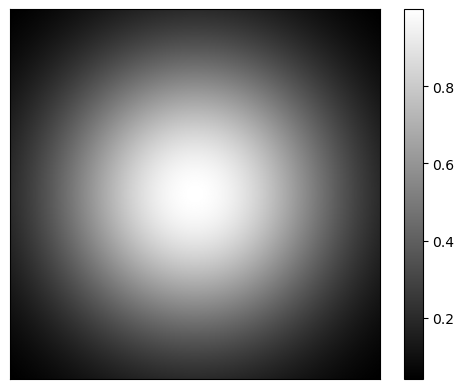

Diffraction limited spot with a 1/1pixel scale
2D Gaussian-like array created


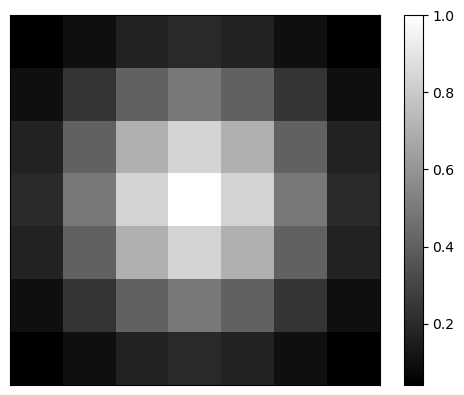

In [2]:
print('Diffraction limited spot with a 500/1pixel scale')
plt.imshow(dsc.create_particle(box_size=7, resolution=500, mu=0.0, sigma=6.7/4), cmap='gray')
cbar = plt.colorbar()
plt.yticks([])
plt.xticks([])
plt.show()
print('Diffraction limited spot with a 1/1pixel scale')
plt.imshow(dsc.create_particle(box_size=7, resolution=7, mu=0.0, sigma=6.7/4), cmap='gray')
cbar = plt.colorbar()
plt.yticks([])
plt.xticks([])
plt.show()

### Creation of Gaussian noise ###

The diffraction limited spot is reconstructed by solving a symmetric 2D Gaussian model with a standard deviation of 6.7/4 pixels or 0.1105μm (a quarter of the Airy disc diameter). The true particle center or the 2D Gaussian mean is set to zero (μ$_x$= μ$_y$ = 0). The Gaussian noise is added by randomly sampling from a Gaussian distribution around zero. The standard deviation of the Gaussian distribution used to sample values also determines the amount of noise. By increasing or decreasing the level of noise we can change the signal/noise ratio.

Create a noisy image of 100x100 pixels 
and a standard deviation of Gaussian noise equal to 0.5 a.u.


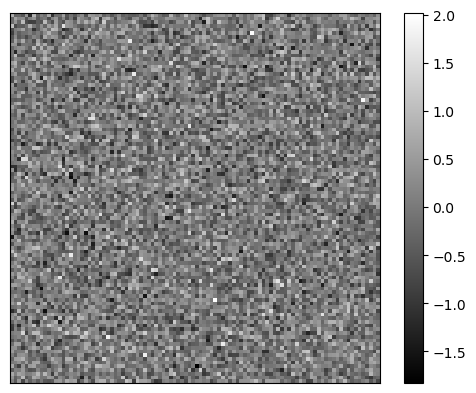

In [3]:
np.random.seed(seed=1)
print('Create a noisy image of 100x100 pixels \nand a standard deviation of Gaussian noise equal to 0.5 a.u.')
array_size=100
noise_array = np.meshgrid(np.linspace(0,0,array_size), np.linspace(0,0,array_size))[0]
plt.imshow(dsc.gaussian_noisy(noise_array,0,0.5), cmap='gray')
plt.colorbar()
plt.yticks([])
plt.xticks([])
plt.show()

### Simulations of static diffraction limited particles with Gaussian noise ###

In [11]:
def create_noisy_movie(noises_dict, frame_range='all', show=False, save_path='none'):
    
    noises = list(noises_dict.keys())

    col_n = 4
    row_n = int(np.ceil(len(noises)/col_n))
    frames = list(noises_dict[noises[0]].keys())

    if frame_range == 'all':
        frame_list = frames
    elif type(frame_range) == int:
        frame_list = list(range(frame_range+1))

    for fr in frame_list:
        fig = plt.figure(figsize=(col_n*3,row_n*3))
        gs = GridSpec(row_n, col_n, figure=fig)
        for i, noise in enumerate(noises):
            ax = fig.add_subplot(gs[i//col_n, i%col_n])
            ax.imshow(noises_dict[noise][fr], cmap='gray')
            ax.set_title('Noise sigma: '+str(noise), fontsize=12)
            ax.set_yticks([])
            ax.set_xticks([])
            ax.plot([5,5+0.5/0.066],[6,6], linewidth=4, color='white')
            ax.text(5,4,'0.5μm', color='white', fontsize=12)
            if i == 0:
                ax.text(5,45,'Frame: '+str(fr), color='white', fontsize=12)
        plt.tight_layout()
        if os.path.exists(save_path):
            plt.savefig(save_path+'/Diffraction_limited_noisy_movie_frame_'+str(fr)+'.png')  
        if show == True:
            plt.show()
        else:
            plt.close()  


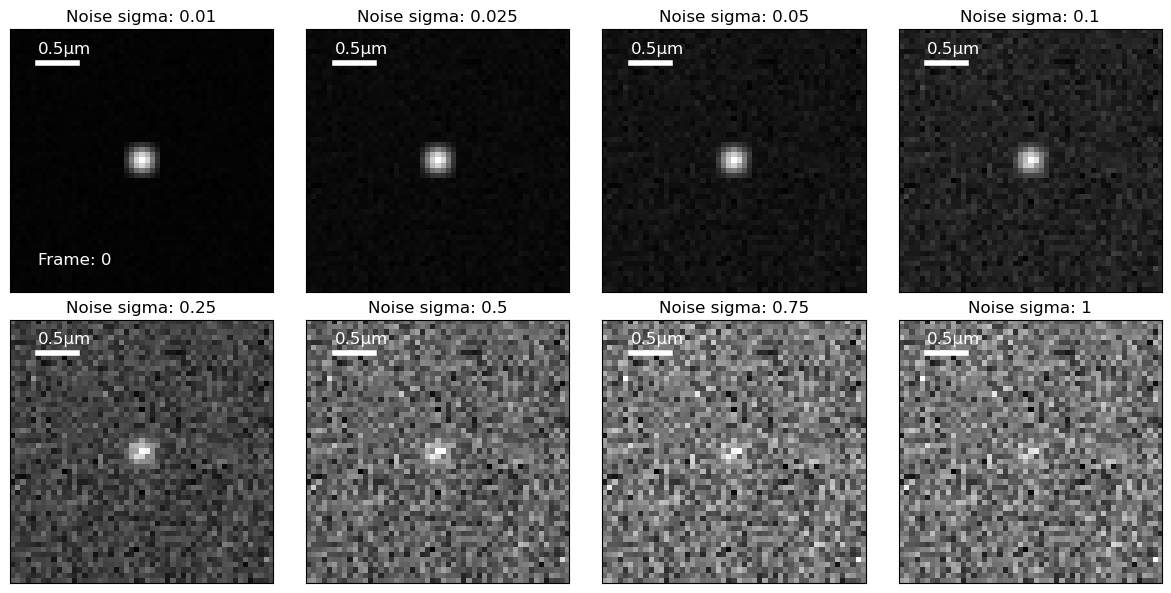

In [12]:
create_noisy_movie(noises_dict, 0, True, 'none')

In [13]:
create_noisy_movie(noises_dict, 99, False, '/Users/alexandros/Documents/Visual_code/Simulation_of_diffraction_limited_spots/Movie_files')